<a href="https://colab.research.google.com/github/dTenebrae/pytorch_start/blob/main/HW_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
from torch import nn
from torch.functional import F
from torch.autograd import Variable

import warnings
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [3]:
# Создайте случайный FloatTensor размера 3x4x5
x = torch.rand((3, 4, 5))
x

tensor([[[0.5045, 0.6595, 0.1493, 0.9230, 0.5915],
         [0.9096, 0.4566, 0.9549, 0.3845, 0.1823],
         [0.3019, 0.5538, 0.6812, 0.3656, 0.4453],
         [0.2826, 0.9375, 0.8953, 0.3382, 0.4615]],

        [[0.3806, 0.1282, 0.4337, 0.3708, 0.9792],
         [0.1408, 0.4355, 0.7110, 0.2793, 0.4600],
         [0.1886, 0.6323, 0.5148, 0.4136, 0.9689],
         [0.6750, 0.4339, 0.1811, 0.7967, 0.5368]],

        [[0.6123, 0.1021, 0.6046, 0.1419, 0.4712],
         [0.6680, 0.5934, 0.0018, 0.7152, 0.8621],
         [0.3566, 0.6030, 0.9871, 0.2384, 0.1454],
         [0.7319, 0.7367, 0.2469, 0.2775, 0.2150]]])

In [4]:
print(f"Dim: {x.dim()}\nShape: {x.size()}\nType: {x.type()}")

Dim: 3
Shape: torch.Size([3, 4, 5])
Type: torch.FloatTensor


In [5]:
# Выведите его форму (shape)
x.shape

torch.Size([3, 4, 5])

In [6]:
# Приведите его к форме 6 X 10
x = x.reshape(6, 10)
x

tensor([[0.5045, 0.6595, 0.1493, 0.9230, 0.5915, 0.9096, 0.4566, 0.9549, 0.3845,
         0.1823],
        [0.3019, 0.5538, 0.6812, 0.3656, 0.4453, 0.2826, 0.9375, 0.8953, 0.3382,
         0.4615],
        [0.3806, 0.1282, 0.4337, 0.3708, 0.9792, 0.1408, 0.4355, 0.7110, 0.2793,
         0.4600],
        [0.1886, 0.6323, 0.5148, 0.4136, 0.9689, 0.6750, 0.4339, 0.1811, 0.7967,
         0.5368],
        [0.6123, 0.1021, 0.6046, 0.1419, 0.4712, 0.6680, 0.5934, 0.0018, 0.7152,
         0.8621],
        [0.3566, 0.6030, 0.9871, 0.2384, 0.1454, 0.7319, 0.7367, 0.2469, 0.2775,
         0.2150]])

In [7]:
x.shape

torch.Size([6, 10])

In [8]:
# Умножьте его на вектор [1, 4, 2, 2, 1] поэлементно

y = torch.Tensor([1, 4, 2, 2, 1, 3]) # размерность вектора не подходит для дальнейших операций, 
                                     # поэтому был добавлен один элемент

x.mul(y.reshape(-1, 1))

tensor([[5.0453e-01, 6.5947e-01, 1.4933e-01, 9.2303e-01, 5.9152e-01, 9.0957e-01,
         4.5657e-01, 9.5485e-01, 3.8446e-01, 1.8228e-01],
        [1.2077e+00, 2.2154e+00, 2.7248e+00, 1.4624e+00, 1.7814e+00, 1.1305e+00,
         3.7501e+00, 3.5811e+00, 1.3529e+00, 1.8460e+00],
        [7.6115e-01, 2.5648e-01, 8.6749e-01, 7.4160e-01, 1.9584e+00, 2.8168e-01,
         8.7096e-01, 1.4219e+00, 5.5864e-01, 9.1998e-01],
        [3.7721e-01, 1.2646e+00, 1.0295e+00, 8.2712e-01, 1.9379e+00, 1.3499e+00,
         8.6771e-01, 3.6220e-01, 1.5935e+00, 1.0735e+00],
        [6.1227e-01, 1.0211e-01, 6.0464e-01, 1.4189e-01, 4.7122e-01, 6.6800e-01,
         5.9337e-01, 1.7970e-03, 7.1521e-01, 8.6207e-01],
        [1.0699e+00, 1.8091e+00, 2.9613e+00, 7.1521e-01, 4.3608e-01, 2.1958e+00,
         2.2100e+00, 7.4078e-01, 8.3252e-01, 6.4507e-01]])

In [9]:
# Умножьте тензор матрично на себя, чтобы результат был размерности 6x6
x @ x.T

tensor([[4.0422, 2.9743, 2.4598, 2.9330, 2.1886, 2.4148],
        [2.9743, 3.2816, 2.4444, 2.6173, 2.3014, 2.5776],
        [2.4598, 2.4444, 2.4503, 2.3605, 1.9725, 1.6478],
        [2.9330, 2.6173, 2.3605, 3.4097, 2.7478, 2.3910],
        [2.1886, 2.3014, 1.9725, 2.7478, 3.0461, 2.2894],
        [2.4148, 2.5776, 1.6478, 2.3910, 2.2894, 2.8058]])

In [10]:
# Посчитайте производную функции y = x**3 + z - 75t в точке (1, 0.5, 2)

Для удобства, приведем формулу к стандартной записи

$$ f(x,y,z)=x^3+y-75z $$

Пусть точка, в которой нужно найти градиент будет

$$ M(1, 0.5, 2) $$

Частные производные:

$\frac{\partial{f}}{\partial{x}} = 3x^2$  

$\frac{\partial{f}}{\partial{x}} = 1$  

$\frac{\partial{f}}{\partial{x}} = -75$  

Градиент будет выглядеть как

$$\nabla f = \frac{\partial{f}}{\partial{x}}\bar{i} + \frac{\partial{f}}{\partial{x}}\bar{j} + \frac{\partial{f}}{\partial{x}}\bar{k}$$

Или для точки M: $$(3, 1, -75)$$

In [11]:
# Вместо использования Variable (который deprecated) можно использовать 
x = torch.tensor(torch.Tensor([1]), requires_grad=True)
y = torch.tensor(torch.Tensor([0.5]), requires_grad=True)
z = torch.tensor(torch.Tensor([2]), requires_grad=True)

In [12]:
x, y, z

(tensor([1.], requires_grad=True),
 tensor([0.5000], requires_grad=True),
 tensor([2.], requires_grad=True))

In [13]:
f = x ** 3 + y - 75 * z

In [14]:
f.backward()

In [15]:
f

tensor([-148.5000], grad_fn=<SubBackward0>)

In [16]:
# Получили значения совпадающие с расчетами
x.grad, y.grad, z.grad

(tensor([3.]), tensor([1.]), tensor([-75.]))

In [17]:
# Создайте единичный тензор размера 5x6
x = torch.ones((5, 6))

In [18]:
# Переведите его в формат numpy
x.numpy()

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]], dtype=float32)

In [19]:
# Давайте теперь пооптимизируем: возьмите функцию y = x**w1 - 2 * x**2 + 5
# Посчитайте 

$$ y = x^{w_1}-2x^2+5 $$

##Нарисуем функцию

In [20]:
def f(x, y):
    return x ** y - 2 * x + 5

x = np.linspace(0, 3, 50)
y = np.linspace(0, 3, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<Figure size 432x288 with 0 Axes>

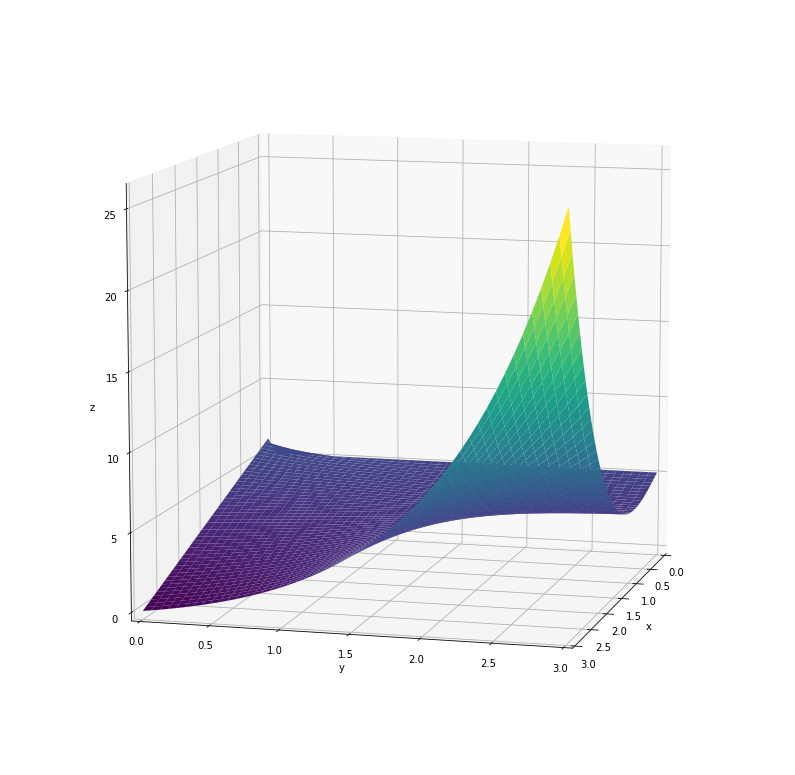

In [21]:
fig = plt.figure()
plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(10, 15)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 26)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [33]:
x = Variable(torch.FloatTensor([0]), requires_grad=True)
w1 = Variable(torch.FloatTensor([0]), requires_grad=True)
opt = torch.optim.SGD([x, w1], lr=.01)
for i in range(1000):
    opt.zero_grad()
    z = x ** w1 - 2 * x + 5
    z.backward() # Calculate gradients
    opt.step()
    print(x, w1)

tensor([0.0200], requires_grad=True) tensor([0.], requires_grad=True)
tensor([0.0400], requires_grad=True) tensor([0.0391], requires_grad=True)
tensor([0.0514], requires_grad=True) tensor([0.0675], requires_grad=True)
tensor([0.0606], requires_grad=True) tensor([0.0918], requires_grad=True)
tensor([0.0689], requires_grad=True) tensor([0.1135], requires_grad=True)
tensor([0.0768], requires_grad=True) tensor([0.1332], requires_grad=True)
tensor([0.0844], requires_grad=True) tensor([0.1514], requires_grad=True)
tensor([0.0921], requires_grad=True) tensor([0.1684], requires_grad=True)
tensor([0.0999], requires_grad=True) tensor([0.1844], requires_grad=True)
tensor([0.1078], requires_grad=True) tensor([0.1995], requires_grad=True)
tensor([0.1159], requires_grad=True) tensor([0.2138], requires_grad=True)
tensor([0.1243], requires_grad=True) tensor([0.2274], requires_grad=True)
tensor([0.1329], requires_grad=True) tensor([0.2403], requires_grad=True)
tensor([0.1418], requires_grad=True) tenso